# 📊 Lead Funnel Drop-off Analysis

This notebook analyzes the student lead funnel to identify where most potential enrollments are lost.

Objective:
Analyze the student lead funnel to identify drop-off stages and determine where most potential enrollments are lost.
The insights will help optimize CRM workflows and advisor follow-ups.

## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [2]:
df = pd.read_csv('funnel_data.csv')
df.head()


,Lead ID,Stage,Timestamp,Advisor,Source,Program
0,1,New Lead,2025-04-01,A3,Website,B.Tech
1,1,Contacted,2025-04-02,A3,Website,B.Tech
2,1,Demo Given,2025-04-03,A3,Website,B.Tech
3,1,Follow-up in Progress,2025-04-04,A3,Website,B.Tech
4,2,New Lead,2025-04-01,A1,Website,B.Tech


In [3]:
df.tail()

,Lead ID,Stage,Timestamp,Advisor,Source,Program
4011,999,Registered,2025-04-05,A1,Website,MBA
4012,1000,New Lead,2025-04-01,A1,Campaign,B.Tech
4013,1000,Contacted,2025-04-02,A1,Campaign,B.Tech
4014,1000,Demo Given,2025-04-03,A1,Campaign,B.Tech
4015,1000,Follow-up in Progress,2025-04-04,A1,Campaign,B.Tech


## 3. Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Lead ID    4016 non-null   int64 
 1   Stage      4016 non-null   object
 2   Timestamp  4016 non-null   object
 3   Advisor    4016 non-null   object
 4   Source     4016 non-null   object
 5   Program    4016 non-null   object
dtypes: int64(1), object(5)
memory usage: 188.4+ KB


In [5]:
df.describe(include='all')

,Lead ID,Stage,Timestamp,Advisor,Source,Program
count,4016.000000,4016,4016,4016,4016,4016
unique,NaN,6,6,3,3,3
top,NaN,New Lead,2025-04-01,A1,Website,Data Science
freq,NaN,1000,1000,1367,1375,1415
mean,499.970120,NaN,NaN,NaN,NaN,NaN
std,288.872833,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,247.000000,NaN,NaN,NaN,NaN,NaN
50%,501.500000,NaN,NaN,NaN,NaN,NaN
75%,751.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()



Lead ID      0
Stage        0
Timestamp    0
Advisor      0
Source       0
Program      0
dtype: int64

In [7]:
# Unique funnel stages
df['Stage'].unique()

array(['New Lead', 'Contacted', 'Demo Given', 'Follow-up in Progress',
       'Registered', 'Dropped / Inactive'], dtype=object)

In [8]:
# Total unique leads
df['Lead ID'].nunique()

1000

In [9]:
# 🔁 Total transitions logged
len(df)

4016

In [10]:
# Number of times each stage was logged
df['Stage'].value_counts()

New Lead                 1000
Contacted                1000
Demo Given                781
Follow-up in Progress     612
Registered                418
Dropped / Inactive        205
Name: Stage, dtype: int64

In [11]:
# Number of unique leads that reached each stage
df.groupby('Stage')['Lead ID'].nunique()

Stage
Contacted                1000
Demo Given                781
Dropped / Inactive        205
Follow-up in Progress     612
New Lead                 1000
Registered                418
Name: Lead ID, dtype: int64

## 4. Stage-wise drop-off metrics

In [12]:
stage_order = ['New Lead', 'Contacted', 'Demo Given', 'Follow-up in Progress', 'Registered', 'Dropped / Inactive']
df['Stage'] = pd.Categorical(df['Stage'], categories=stage_order, ordered=True)

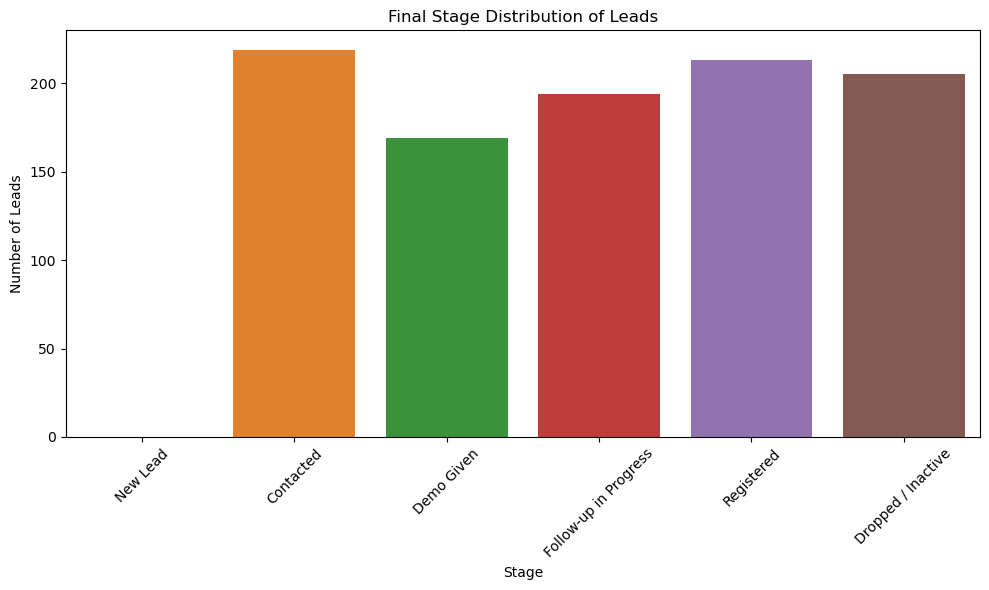

In [13]:
# Count number of leads at each stage
lead_stage = df.sort_values(['Lead ID', 'Timestamp']).drop_duplicates(['Lead ID'], keep='last')
stage_counts = lead_stage['Stage'].value_counts().loc[stage_order]

plt.figure(figsize=(10,6))
sns.barplot(x=stage_counts.index, y=stage_counts.values)
plt.xticks(rotation=45)
plt.title('Final Stage Distribution of Leads')
plt.xlabel('Stage')
plt.ylabel('Number of Leads')
plt.tight_layout()
plt.show()

## 5. Drop-off Rates

In [14]:
# Count unique leads reaching each stage
stage_progression = df.drop_duplicates(['Lead ID', 'Stage'])['Stage'].value_counts().reindex(stage_order)

# Drop-off rate from one stage to the next
stage_dropoffs = stage_progression.shift(1) - stage_progression
stage_dropoffs_percentage = (stage_dropoffs / stage_progression.shift(1) * 100).round(2)

pd.DataFrame({
    'Leads at Stage': stage_progression,
    'Drop-off Count': stage_dropoffs,
    'Drop-off Rate (%)': stage_dropoffs_percentage
})

,Leads at Stage,Drop-off Count,Drop-off Rate (%)
New Lead,1000,NaN,NaN
Contacted,1000,0.0,0.00
Demo Given,781,219.0,21.90
Follow-up in Progress,612,169.0,21.64
Registered,418,194.0,31.70
Dropped / Inactive,205,213.0,50.96


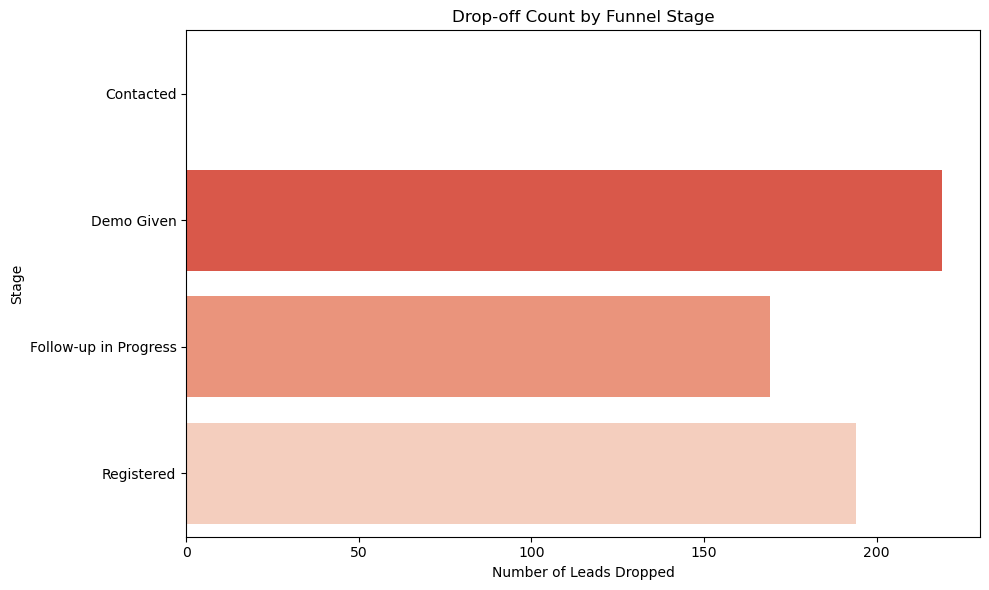

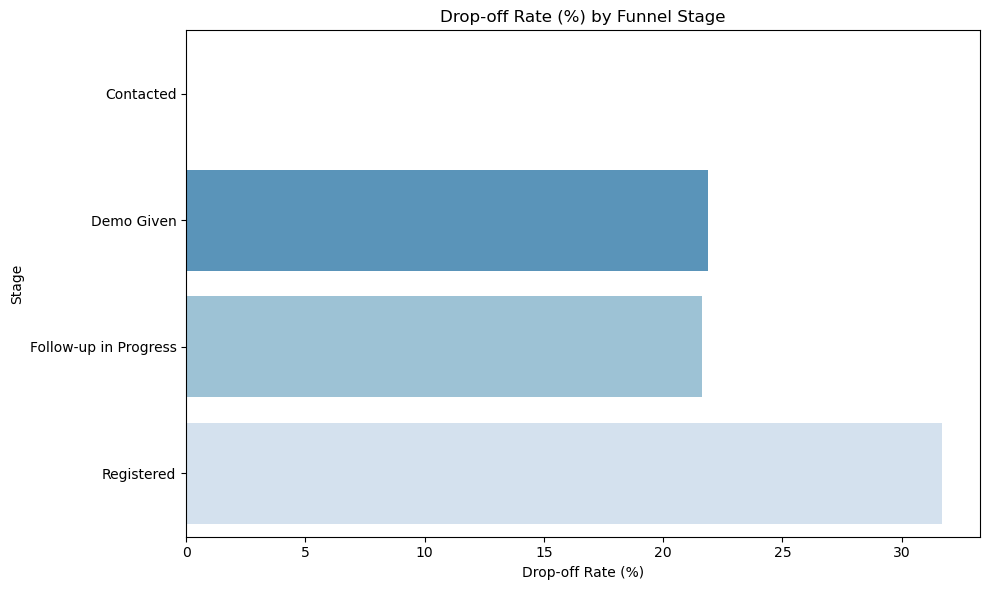

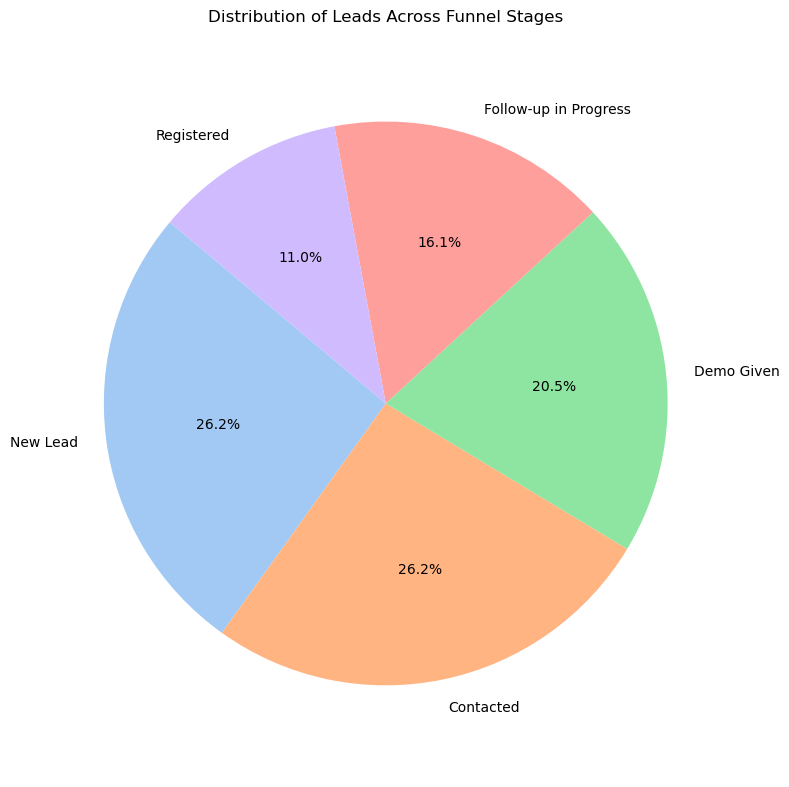

In [16]:
stage_order = ['New Lead', 'Contacted', 'Demo Given', 'Follow-up in Progress', 'Registered']

# Count unique leads reaching each stage
stage_progression = df.drop_duplicates(['Lead ID', 'Stage'])['Stage'].value_counts().reindex(stage_order)

# Drop-off calculations
stage_dropoffs = stage_progression.shift(1) - stage_progression
stage_dropoffs_percentage = (stage_dropoffs / stage_progression.shift(1) * 100).round(2)

# Create the DataFrame
stage_drop_df = pd.DataFrame({
    'Stage': stage_order,
    'Leads at Stage': stage_progression.values,
    'Drop-off Count': stage_dropoffs.values,
    'Drop-off Rate (%)': stage_dropoffs_percentage.values
}).dropna()

# Drop-off Count Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Drop-off Count', y='Stage', data=stage_drop_df, palette='Reds_r')
plt.title('Drop-off Count by Funnel Stage')
plt.xlabel('Number of Leads Dropped')
plt.ylabel('Stage')
plt.tight_layout()
plt.show()

#  Drop-off Rate Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Drop-off Rate (%)', y='Stage', data=stage_drop_df, palette='Blues_r')
plt.title('Drop-off Rate (%) by Funnel Stage')
plt.xlabel('Drop-off Rate (%)')
plt.ylabel('Stage')
plt.tight_layout()
plt.show()

#  Pie Chart: Leads per Stage
plt.figure(figsize=(8, 8))
plt.pie(stage_progression, labels=stage_order, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Leads Across Funnel Stages')
plt.axis('equal')
plt.tight_layout()
plt.show()

Advisor-wise Metrics:
 Stage    Drop Rate (%)  Conversion Rate (%)
Advisor                                    
A1           20.882353            22.352941
A2           18.879056            20.943953
A3           21.806854            20.560748

Source-wise Metrics:
 Stage     Drop Rate (%)  Conversion Rate (%)
Source                                      
Campaign      22.256098            20.121951
Referral      19.814241            22.600619
Website       19.484241            21.203438

Program-wise Metrics:
 Stage         Drop Rate (%)  Conversion Rate (%)
Program                                         
B.Tech            18.867925            18.867925
Data Science      22.766571            24.495677
MBA               19.701493            20.298507


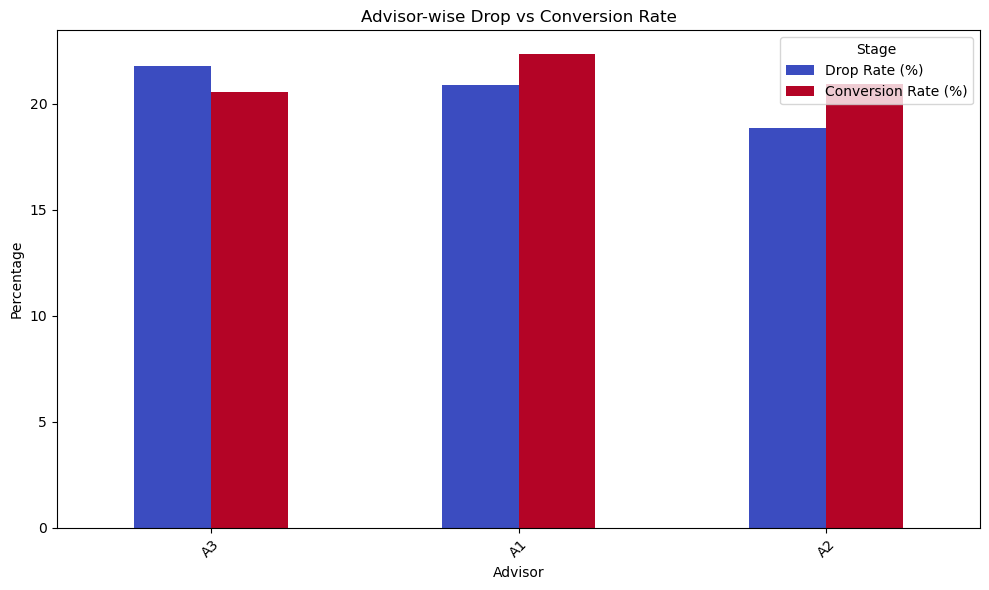

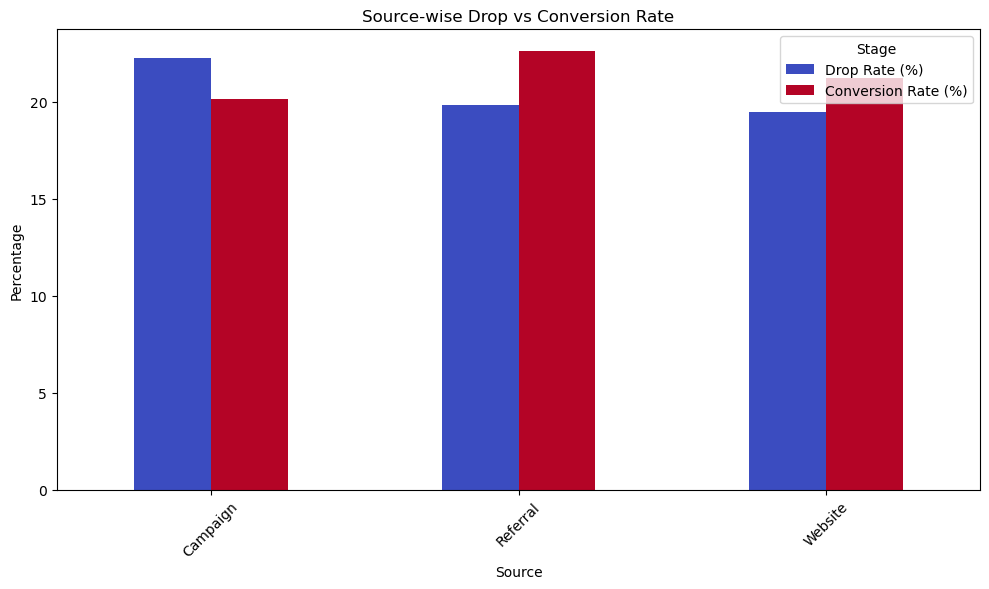

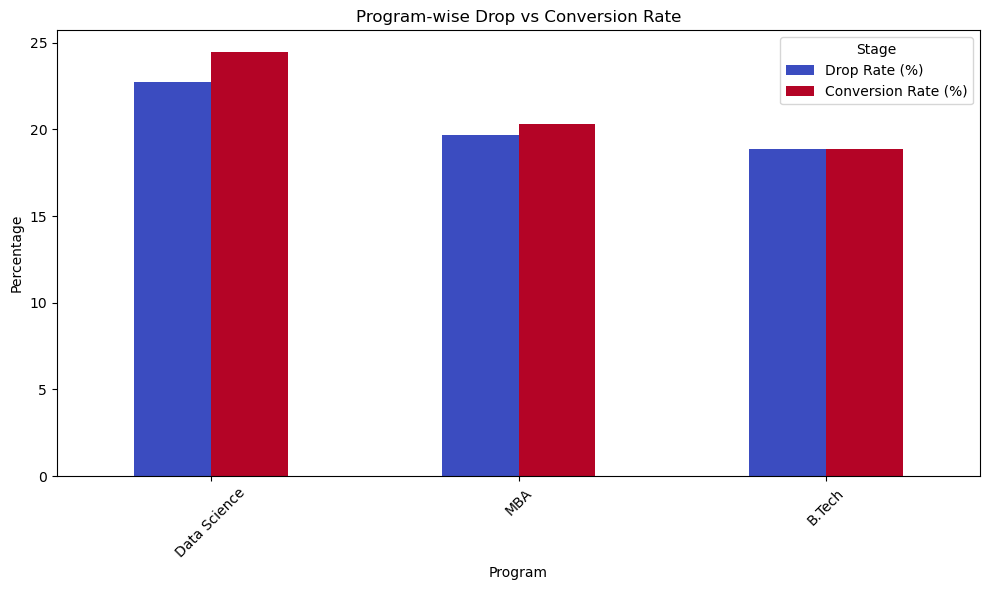

In [17]:
# Convert Timestamp to datetime and sort
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_sorted = df.sort_values(by=['Lead ID', 'Timestamp'])

# Get the final stage for each Lead ID
lead_final_stage = df_sorted.groupby('Lead ID').last().reset_index()

# Helper function to compute drop and conversion metrics
def compute_drop_metrics(group_col):
    segment_df = lead_final_stage.groupby(group_col)['Stage'].value_counts(normalize=True).unstack().fillna(0) * 100
    segment_df['Drop Rate (%)'] = segment_df.get('Dropped / Inactive', 0)
    segment_df['Conversion Rate (%)'] = segment_df.get('Registered', 0)
    return segment_df[['Drop Rate (%)', 'Conversion Rate (%)']]

# Compute metrics
advisor_metrics = compute_drop_metrics('Advisor')
source_metrics = compute_drop_metrics('Source')
program_metrics = compute_drop_metrics('Program')

# Display tables
print("Advisor-wise Metrics:\n", advisor_metrics)
print("\nSource-wise Metrics:\n", source_metrics)
print("\nProgram-wise Metrics:\n", program_metrics)

# Plotting function
def plot_segment_chart(df, title):
    df[['Drop Rate (%)', 'Conversion Rate (%)']].sort_values('Drop Rate (%)', ascending=False).plot(
        kind='bar', figsize=(10, 6), colormap='coolwarm')
    plt.title(title)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Generate plots
plot_segment_chart(advisor_metrics, 'Advisor-wise Drop vs Conversion Rate')
plot_segment_chart(source_metrics, 'Source-wise Drop vs Conversion Rate')
plot_segment_chart(program_metrics, 'Program-wise Drop vs Conversion Rate')

## 🔍 Key Insights & Recommendations

### 1. Funnel Performance
- A significant number of leads drop between **"Contacted" → "Demo Given"** and **"Follow-up in Progress" → "Registered"** stages.
- This indicates that the **middle and bottom funnel need stronger follow-up strategies** and better engagement after demos.

### 2. Advisor-wise Insights
- Some advisors consistently achieve higher conversion rates while others show higher drop-offs.
- These differences suggest the need for **training, best practice sharing, and performance monitoring** across advisors.

### 3. Source-wise Insights
- Leads from **Referral** and **Campaign** sources have **better conversion rates** than those from Website or cold sources.
- Focus marketing efforts on high-performing sources and reassess ROI from low-converting ones.

### 4. Program-wise Insights
- Programs like **Data Science** and **MBA** show relatively **higher registration rates**.
- This suggests these programs are more attractive or better marketed. Other programs may need repositioning or added support.

### 5. Overall Recommendations
- Strengthen follow-up process post-demo with clear timelines and reminders.
- Personalize demos to align with student interests.
- Automate touchpoints between “Demo Given” and “Registered” stages.
- Use top advisors as benchmarks or mentors for others.
- Build an advisor performance dashboard for ongoing monitoring.
